In [1]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


V5: noisier and more realistic

In [2]:
time_window = 50
batch_size = 128 # 128: anil kag

ckpt_dir = 'copymemory_04_2025_tests'

dataset = 'copymemory_episodic'
#dataset = 'addtask' 

num_epochs = 3000 # important: epochs here refer to iteration steps

dataset_size = batch_size*num_epochs

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   dataset_size = dataset_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

C:\Users\Alberto\Python\SNNdelays\snn_delays\datasets\sequential_datasets.py:280: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3641.)
  label[:,0] = seq[start_time:start_time + mem_length, 0].T.clone().detach()


torch.Size([128, 50, 3])
torch.Size([128, 5, 5])


In [3]:
train_loader

In [4]:
len(train_loader)

3000

In [5]:
print(lbl[0])

tensor([[0.7000, 0.3000, 0.4000, 0.5000, 0.1000],
        [0.7000, 0.3000, 0.4000, 0.5000, 0.1000],
        [0.7000, 0.3000, 0.4000, 0.5000, 0.1000],
        [0.7000, 0.3000, 0.4000, 0.5000, 0.1000],
        [0.7000, 0.3000, 0.4000, 0.5000, 0.1000]], device='cuda:0')


Training copy memory task

In [6]:
num_h = 64

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
#snn_f.num_train_samples = batch_size
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
#snn_rnn.num_train_samples = batch_size
snn_rnn.to(device)

extra_kwargs = {'delay_range':(40, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
#snn_rd.num_train_samples = batch_size
snn_rd.to(device)

Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=2560, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=5, bias=False)
    )
  )
)

28 min

In [7]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rnn, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rd, train_loader, test_loader, 1e-3, 1, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)

Epoch [1/1], learning_rates 0.001000, 1.000000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [300/3000], Loss: 0.06680
Step [600/3000], Loss: 0.06000
Step [900/3000], Loss: 0.05870
Step [1200/3000], Loss: 0.05273
Step [1500/3000], Loss: 0.04644
Step [1800/3000], Loss: 0.04881
Step [2100/3000], Loss: 0.04681
Step [2400/3000], Loss: 0.04604
Step [2700/3000], Loss: 0.04440
Step [3000/3000], Loss: 0.04453
384000
Time elasped: 1315.3121647834778
Epoch [1/1], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 0.06967
Step [600/3000], Loss: 0.06681
Step [900/3000], Loss: 0.06692
Step [1200/3000], Loss: 0.06487
Step [1500/3000], Loss: 0.06842
Step [1800/3000], Loss: 0.06550
Step [2100/3000], Loss: 0.06781
Step [2400/3000], Loss: 0.06686
Step [2700/3000], Loss: 0.06269
Step [3000/3000], Loss: 0.06622
384000
Time elasped: 1074.0010044574738
Epoch [1/1], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 0.05694
Step [600/3000], Loss: 0.04284
Step [900/3000], Loss: 0.03176
Step [1200/3000], Loss: 0.02082
Step [1500/3000], Loss: 0.01878
Step [1800/3000], Loss: 0.01483
Ste

Text(0.5, 1.0, 'train loss')

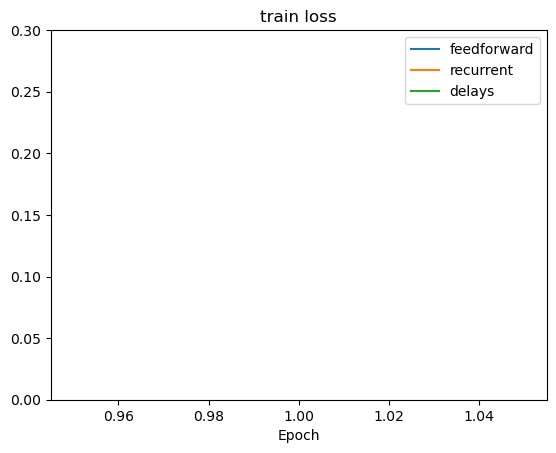

In [8]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 0.3)
plt.title('train loss')

In [9]:
snn_f.debug = True
snn_rnn.debug = True
snn_rd.debug = True
snn_f.init_state_logger()
snn_rnn.init_state_logger()
snn_rd.init_state_logger()

from snn_delays.utils.train_utils_refact_minimal import propagate_batch_simple
images, labels_mf = propagate_batch_simple(snn_f, test_loader)
_, labels_rnn = propagate_batch_simple(snn_rnn, test_loader)
_, labels_rd = propagate_batch_simple(snn_rd, test_loader)

In [10]:
ref_mf = labels_mf[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_mf = snn_f.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rnn = labels_rnn[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_rnn = snn_rnn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rd = labels_rd[:,:int(0.1*time_window),:].permute(1, 0, 2).cpu().numpy()
out_rd = snn_rd.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

In [11]:
print(np.abs(ref_mf - out_mf).sum())
print(np.abs(ref_rnn - out_rnn).sum())
print(np.abs(ref_rd - out_rd).sum())

567.8028
719.48553
194.55782


In [12]:
from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4
# Create a figure with 3 rows and N columns (for stacking results horizontally)

def plot_add_task(output, reference, N, axes=None, name=''):

    ns = 50 # num samples to display for better viz

    ref = reference[:, :ns , N]
    out = output[:, :ns , N]
    diff = abs(ref-out)

    print(np.mean(diff))

    if axes is None:
        fig, axes = plt.subplots(3, 1, figsize=(5, 10))  # Create a new figure if axes not provided

    axes[0].imshow(ref, vmin=0, vmax=0.9)
    axes[0].set_title('Reference '+name)
    axes[0].set_ylabel('Time')

    axes[1].imshow(out, vmin=0, vmax=0.9)
    axes[1].set_title('Output')
    axes[1].set_ylabel('Time')

    axes[2].imshow(diff, vmin=0.0, vmax=1.0)
    axes[2].set_title('Difference')
    axes[2].set_ylabel('Time')
    axes[2].set_xlabel('Training Sample')

    return axes  # Return the axes to be used in an external figure

0.1999817
0.24145071
0.043750506


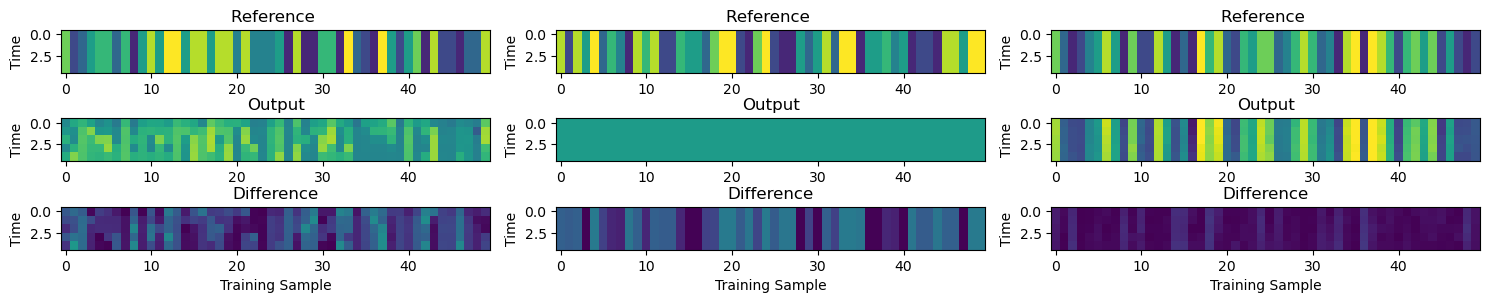

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 0, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 0, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 0, axes[:, 2])  

plt.tight_layout()
plt.show()

0.19062634
0.22718666
0.062162902


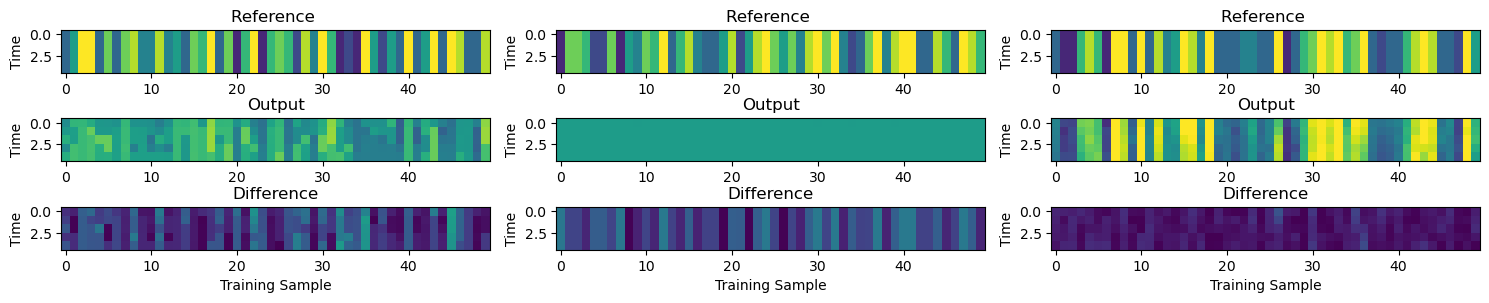

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 1, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 1, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 1, axes[:, 2])  

plt.tight_layout()
plt.show()

0.1901431
0.18777163
0.049397107


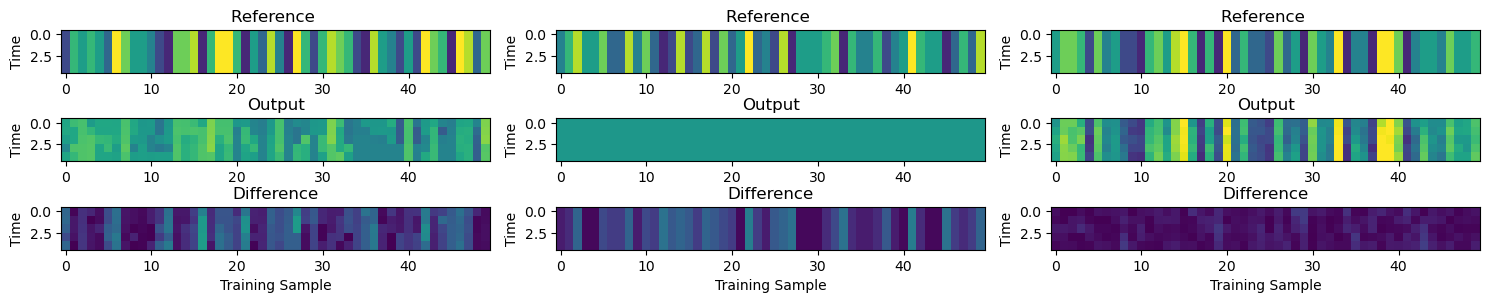

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 2, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 2, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 2, axes[:, 2])  

plt.tight_layout()
plt.show()

0.19401027
0.23282343
0.08336357


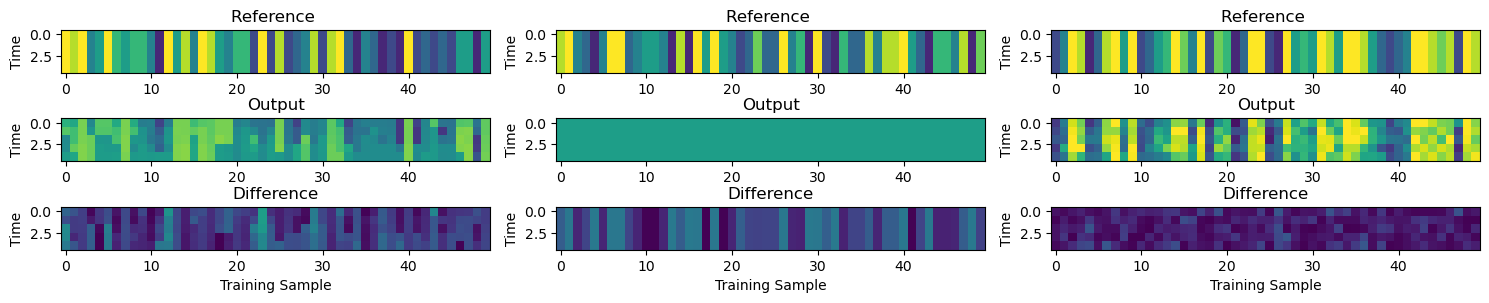

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 3, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 3, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 3, axes[:, 2])  

plt.tight_layout()
plt.show()

0.12644769
0.2198154
0.07130668


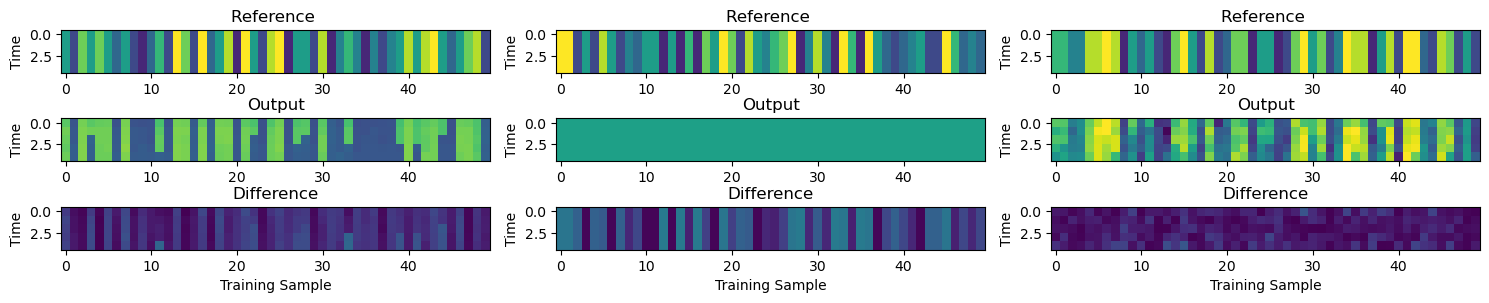

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 4, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 4, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 4, axes[:, 2])  

plt.tight_layout()
plt.show()